<a href="https://colab.research.google.com/github/ejmillar/final_project/blob/main/DS_110_Shroom_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shawn Lau, Evan Millar

Shroom data file Kaggle link: https://www.kaggle.com/datasets/uciml/mushroom-classification/

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv


In [ ]:
import pandas as pd
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('mushrooms.csv')

#DATA CLEANING
def clean(frame):
  y = frame['class']
  frame = frame.drop('class', axis=1)

  #One-hot-encoding
  word_dict = {}
  for column in frame.columns:
      unique_categories = frame[column].unique()
      for category in unique_categories:
          col_name = f"{column}_{category}"
          word_present_list = (frame[column] == category)
          word_dict[col_name] = word_present_list.astype(int)
  frame = pd.DataFrame(word_dict)

  #One hot encode poison column
  frame.insert(0, 'poison', y)
  frame.loc[frame.poison == "p", "poison"] = 1
  frame.loc[frame.poison == "e", "poison"] = 0
  frame['poison'] = pd.to_numeric(frame['poison'])

  return(frame)

#Clean
df = clean(df)

# Check for missing data in the entire DataFrame
missing_data = df.isnull()
missing_count_per_column = missing_data.sum()

print("Number of missing values in each column:")
print(missing_count_per_column)

display(df.head())


Number of missing values in each column:
poison         0
cap-shape_x    0
cap-shape_b    0
cap-shape_s    0
cap-shape_f    0
              ..
habitat_m      0
habitat_d      0
habitat_p      0
habitat_w      0
habitat_l      0
Length: 118, dtype: int64


,poison,cap-shape_x,cap-shape_b,cap-shape_s,cap-shape_f,cap-shape_k,cap-shape_c,cap-surface_s,cap-surface_y,cap-surface_f,...,population_v,population_y,population_c,habitat_u,habitat_g,habitat_m,habitat_d,habitat_p,habitat_w,habitat_l
0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#STATS
import pandas as pd
from scipy.stats import chi2_contingency

df = pd.read_csv('mushrooms.csv')

#Clean
X = df.drop('class', axis=1)
df = clean(df)

poison = []
edible = []

#Find poison/nonpoison count for each cap-color
for x in X["cap-color"].unique():
  poison.append(len(df[(df["poison"] == 1) & (df[f"cap-color_{x}"] == 1)]))
  edible.append(len(df[(df["poison"] == 0) & (df[f"cap-color_{x}"] == 1)]))

#Convert poison/edible numbers to percentages (normalization)
for i in range(len(poison)):
  sum = poison[i] + edible[i]
  poison[i] = poison[i] / sum
  edible[i] = edible[i] / sum

contingency_table = [poison, edible]

#Chi-square test
stat, p, _, _ = chi2_contingency(contingency_table)

#Result
print(f"Cap-color and Poison P-value: {p}")


Cap-color and Poison P-value: 0.9833534869760598


In [ ]:
#DECISION TREE

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#FIRST TREE
y = df['poison']
X = df.drop('poison', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Tree Accuracy: {accuracy}")

#REVISED TREE (max_depth=4)
y = df['poison']
X = df.drop('poison', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=4)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Revised Tree Accuracy: {accuracy}")


Initial Tree Accuracy: 1.0
Revised Tree Accuracy: 0.9827692307692307


[Text(0.4583333333333333, 0.9, 'odor_n <= 0.5\nentropy = 0.999\nsamples = 6499\nvalue = [3365, 3134]\nclass = 0'),
 Text(0.16666666666666666, 0.7, 'bruises_t <= 0.5\nentropy = 0.66\nsamples = 3666\nvalue = [627, 3039]\nclass = 1'),
 Text(0.08333333333333333, 0.5, 'entropy = 0.0\nsamples = 2612\nvalue = [0, 2612]\nclass = 1'),
 Text(0.25, 0.5, 'stalk-root_c <= 0.5\nentropy = 0.974\nsamples = 1054\nvalue = [627, 427]\nclass = 0'),
 Text(0.16666666666666666, 0.3, 'stalk-root_r <= 0.5\nentropy = 0.918\nsamples = 640\nvalue = [213, 427]\nclass = 1'),
 Text(0.08333333333333333, 0.1, 'entropy = 0.582\nsamples = 496\nvalue = [69, 427]\nclass = 1'),
 Text(0.25, 0.1, 'entropy = 0.0\nsamples = 144\nvalue = [144, 0]\nclass = 0'),
 Text(0.3333333333333333, 0.3, 'entropy = 0.0\nsamples = 414\nvalue = [414, 0]\nclass = 0'),
 Text(0.75, 0.7, 'spore-print-color_r <= 0.5\nentropy = 0.212\nsamples = 2833\nvalue = [2738, 95]\nclass = 0'),
 Text(0.6666666666666666, 0.5, 'stalk-surface-below-ring_y <= 0.5\n

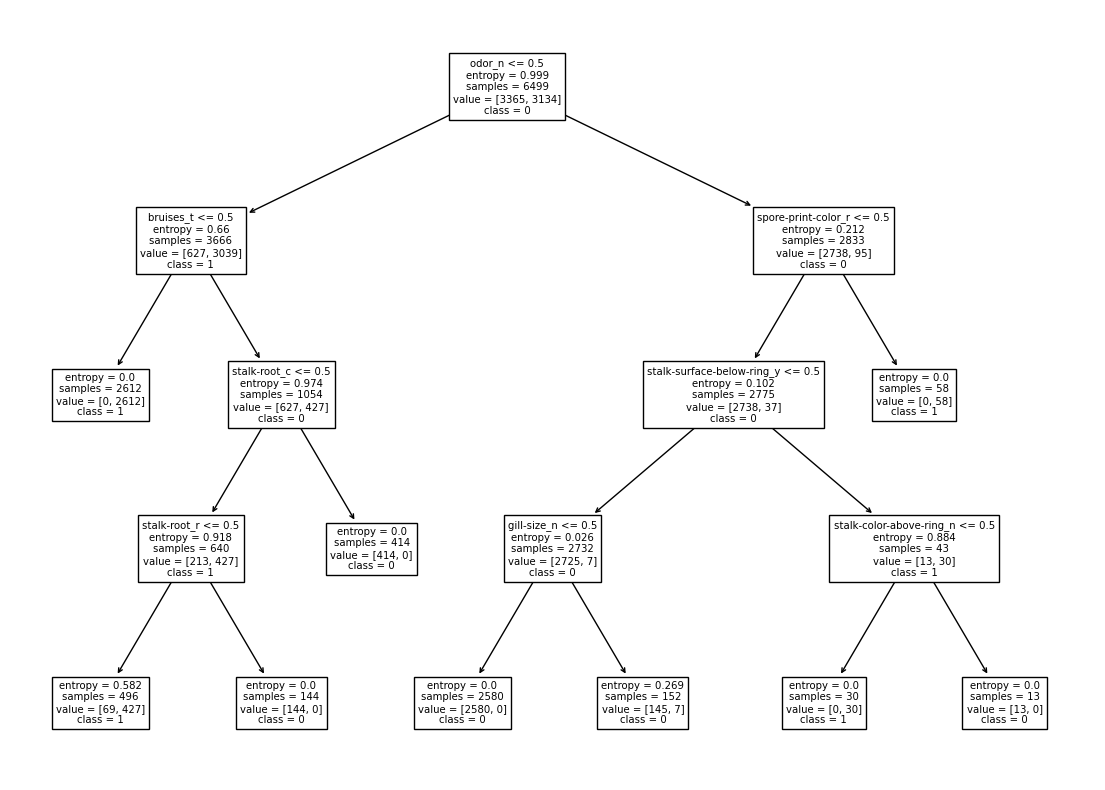

In [ ]:
#TREE VISUAL
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import tree

plt.figure(figsize=(14, 10))
tree.plot_tree(clf, feature_names = X.columns, class_names = ["0","1"])

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

#Separate label from features
y = df['poison']
X = df.drop('poison', axis=1)

#FIRST FOREST
features_train, features_test, labels_train, labels_test = \
  train_test_split(X, y, test_size=0.2, random_state=42)

#Validation set
features_train, features_val, labels_train, labels_val = \
  train_test_split(features_train, labels_train, test_size=0.2, random_state=42)

#Train
Shroomforest = RandomForestClassifier(n_estimators=200)
Shroomforest.fit(features_train, labels_train)

print(f"Initial Forest Accuracy: {Shroomforest.score(features_test, labels_test)}")


#REVISED FOREST (max_depth=4, max_features=5)
features_train, features_test, labels_train, labels_test = \
  train_test_split(X, y, test_size=0.2, random_state=42)

#Validation set
features_train, features_val, labels_train, labels_val = \
  train_test_split(features_train, labels_train, test_size=0.2, random_state=42)

#Train
Shroomforest = RandomForestClassifier(n_estimators=200, max_depth=4, max_features=5)
Shroomforest.fit(features_train, labels_train)

print(f"Revised Forest Accuracy: {Shroomforest.score(features_test, labels_test)}")


Initial Forest Accuracy: 1.0
Revised Forest Accuracy: 0.9655384615384616


In [ ]:
#Top 8 most important features
for x in X.columns[Shroomforest.feature_importances_.argsort()[-8:][::-1]]:
  print(x)

odor_n
odor_f
stalk-surface-below-ring_k
gill-color_b
spore-print-color_h
ring-type_p
gill-size_b
gill-size_n


Text(0.5, 1.0, 'Poisonous/Nonpoisonous Count by Cap-color')

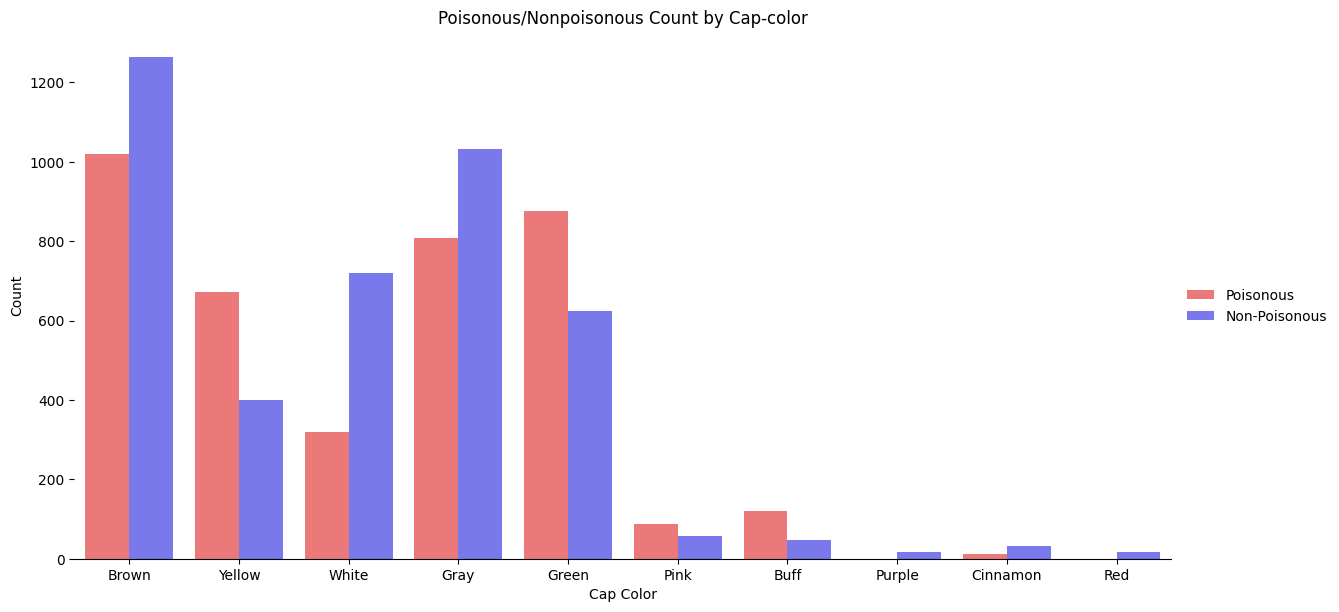

In [ ]:
#SEABORN Grouped Barplot
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('mushrooms.csv')

#Clean
X = df.drop('class', axis=1)
df = clean(df)

#Lists of counts of cap-colors by color
traitList = []
poison = []
edible = []
for color in X["cap-color"].unique():
  traitList.append(color)
  poison.append(len(df[(df["poison"] == 1) & (df[f"cap-color_{color}"] == 1)]))
  edible.append(len(df[(df["poison"] == 0) & (df[f"cap-color_{color}"] == 1)]))

#Replace letters to color names (from dataset description)
mappingDict = {'n': 'Brown', 'y': 'Yellow', 'w': 'White', 'g': 'Gray', 'e': 'Green',
                'p': 'Pink', 'b': 'Buff', 'u': 'Purple', 'c': 'Cinnamon', 'r': 'Red'}
newTraitList = [mappingDict[val] for val in traitList]

#Create DataFrame for Seaborn
data = {'Trait': newTraitList * 2,  # Repeat traits for poisonous and non-poisonous
        'Count': poison + edible,
        'Poisonous': ['Poisonous'] * len(newTraitList) + ['Non-Poisonous'] * len(newTraitList)}
graphFrame = pd.DataFrame(data)

#Create Chart
custom = {'Poisonous': 'red', 'Non-Poisonous': 'blue'}
g = sns.catplot(
    data=graphFrame, kind="bar",
    x="Trait", y="Count", hue='Poisonous',
    errorbar="sd", palette=custom, alpha=.6, height=6, aspect=2,
)
g.despine(left=True)
g.set_axis_labels("Cap Color", "Count")
g.legend.set_title("")

plt.title('Poisonous/Nonpoisonous Count by Cap-color')


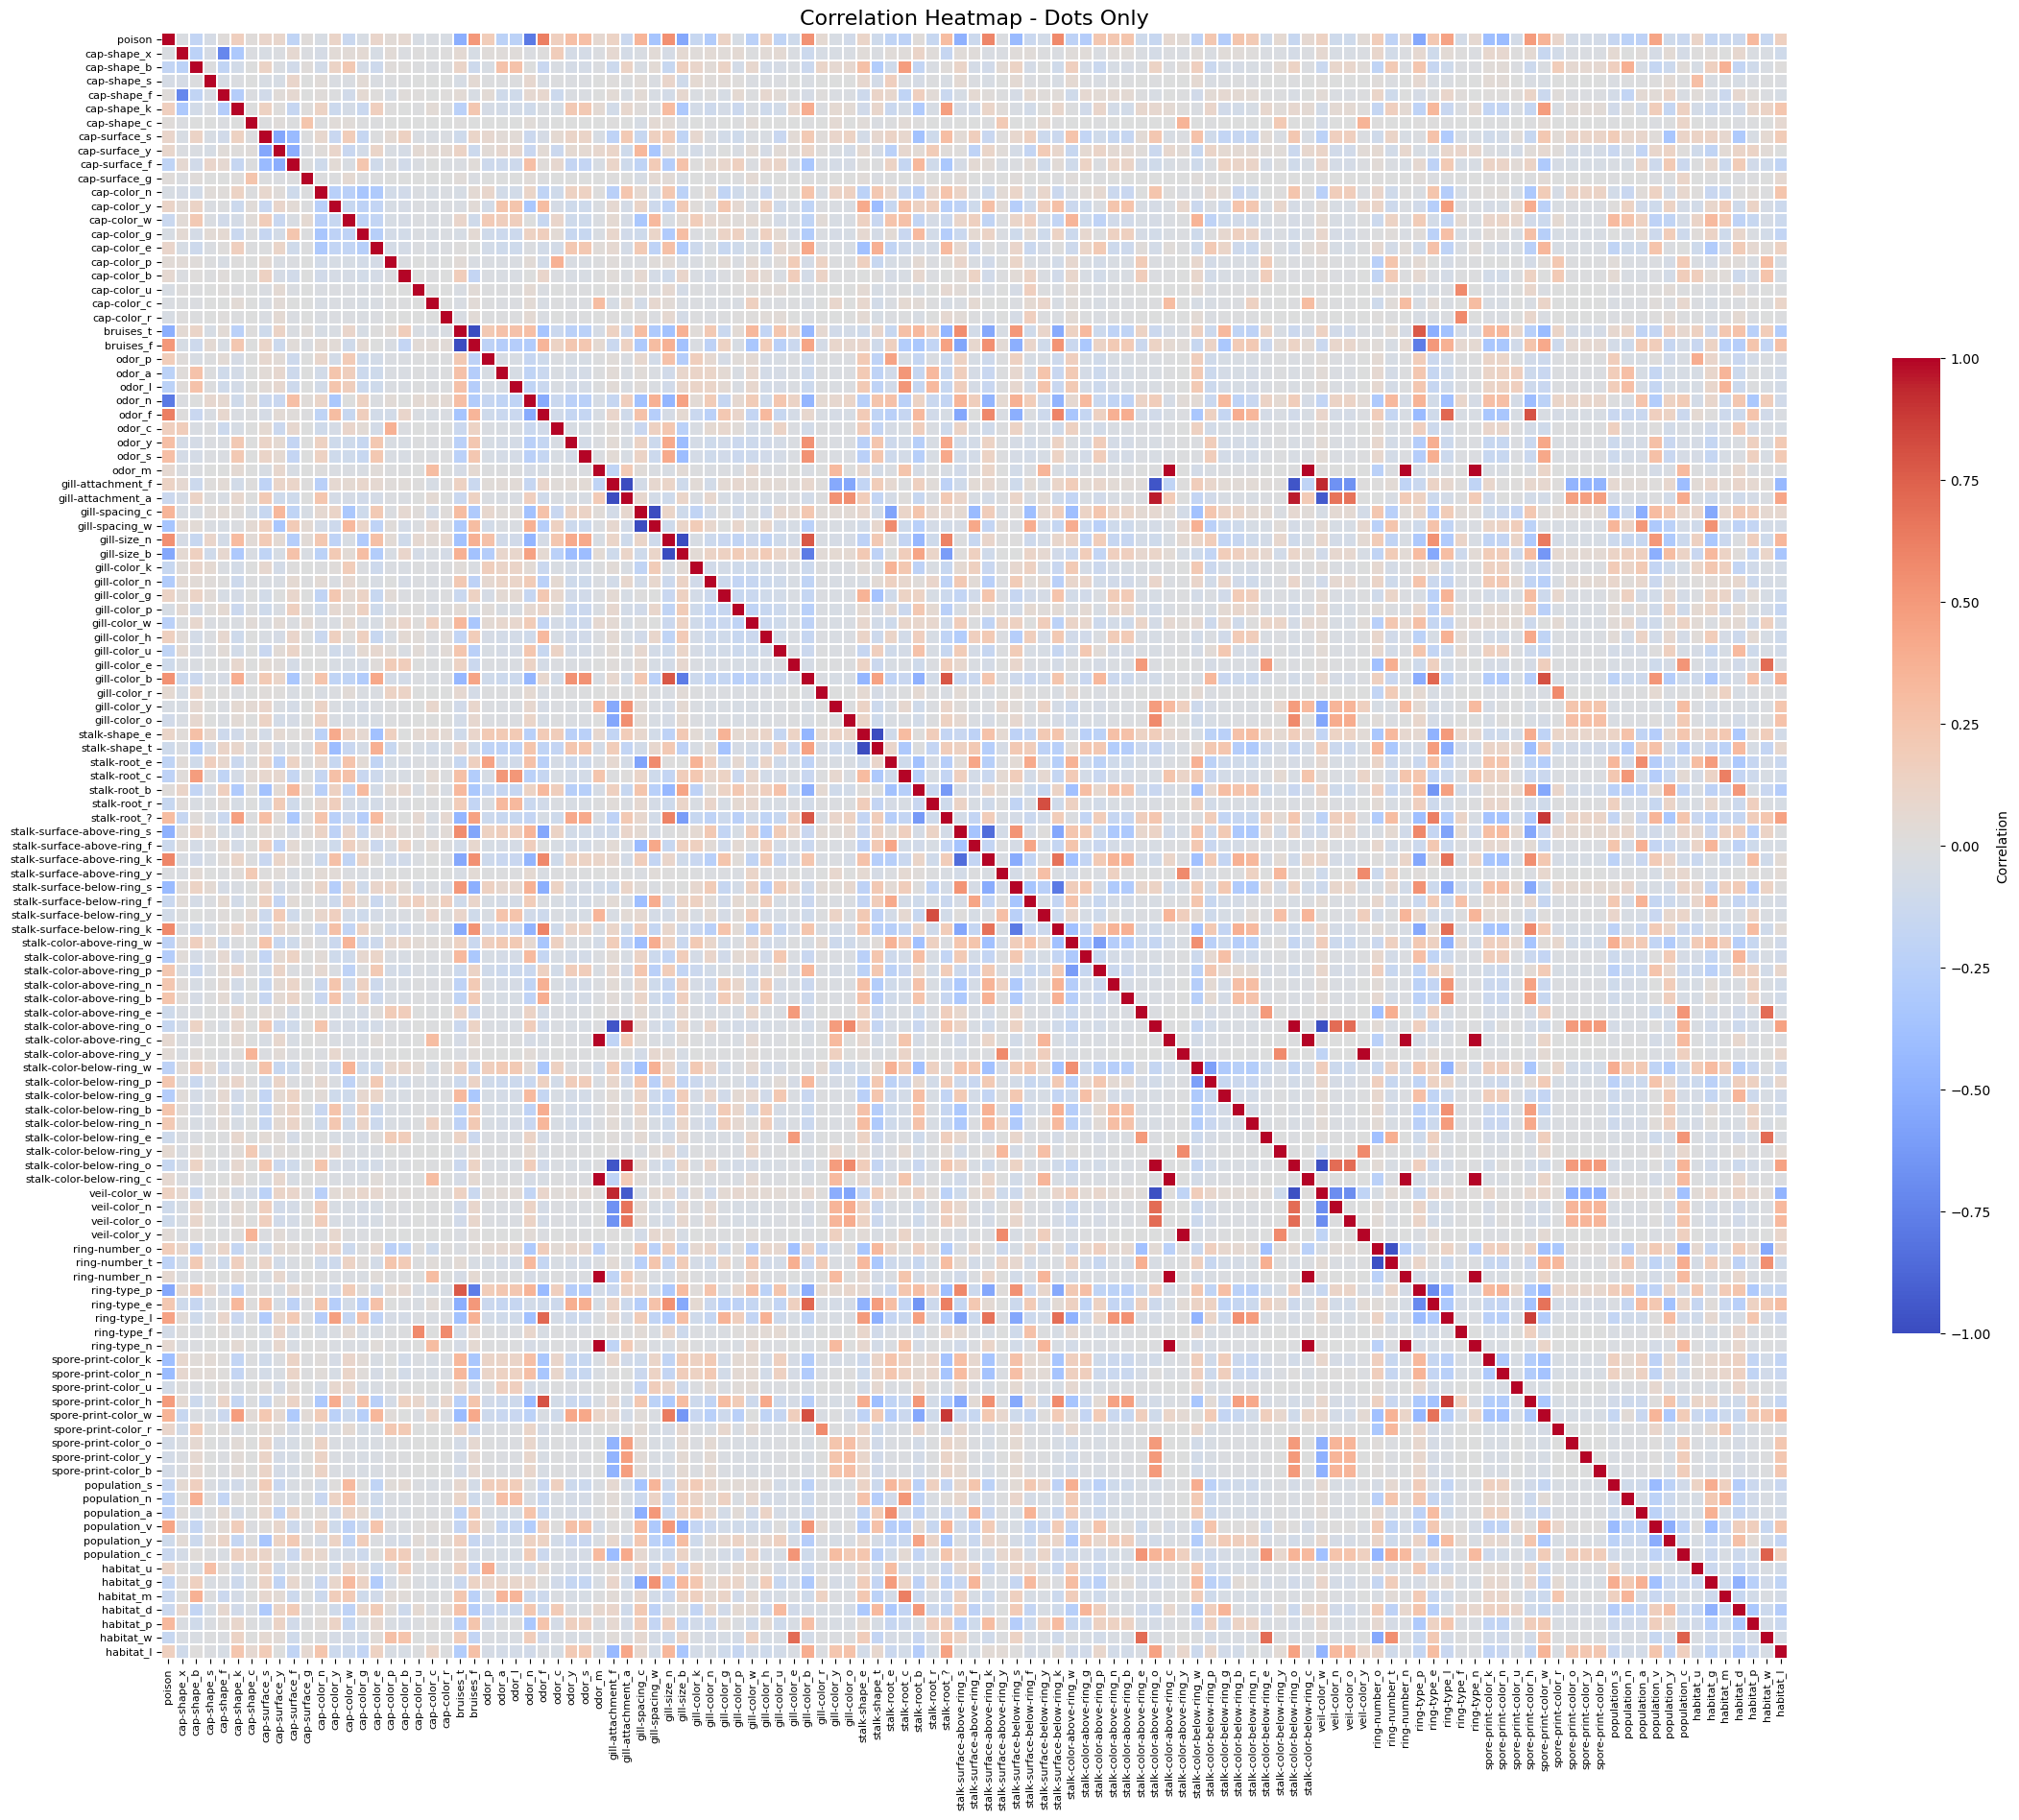

In [ ]:
#SEABORN Correlated Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

df_filter = df.drop("veil-type_p", axis=1) #remove veil-type p (only has 1 value)
correlation_matrix = df_filter.corr()

# Create a larger heatmap with adjusted label font size
plt.figure(figsize=(28, 22))
sns.heatmap(
    correlation_matrix,
    annot=False,  # Do not display numerical annotations
    cmap='coolwarm',
    linewidths=0.05,
    vmin=-1, vmax=1,
    square=True,
    cbar_kws={"shrink": 0.6, "label": 'Correlation'},
)


# Remove grid lines
plt.grid(False)

# Adjust label font size
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.title('Correlation Heatmap - Dots Only', fontsize=16)
plt.show()